In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Crie uma lista de dados

data = [
    [dt.datetime(2020, 1, 1, 10, 13), 2222, 1, True],
    [dt.datetime(2020, 1, 2), np.nan, 2, False],
    [dt.datetime(2020, 1, 2), np.inf, 3, True]
]

# Crie um DataFrame

df = pd.DataFrame(
    data=data,
    columns=["Dates", "Floats", "Integers", "Booleans"]
)

# Defina o nome do índice

df.index.name = "index"

# Exiba o DataFrame

print(df)

                    Dates  Floats  Integers  Booleans
index                                                
0     2020-01-01 10:13:00  2222.0         1      True
1     2020-01-02 00:00:00     NaN         2     False
2     2020-01-02 00:00:00     inf         3      True


In [8]:
df.to_excel(
    "written_with_pandas.xlsx",
    sheet_name="Output",
    startrow=1,
    startcol=1,
    index=True,
    header=True,
    na_rep="<NA>",
    inf_rep="<INF>"
)


In [ ]:
# Esse código salvará o DataFrame df em um arquivo Excel chamado "written_with_pandas.xlsx" com as seguintes configurações:

# - sheet_name="Output": O nome da planilha no arquivo Excel será "Output".
# - startrow=1 e startcol=1: O DataFrame será escrito começando da segunda linha e segunda coluna da planilha.
# - index=True: O índice do DataFrame será incluído no arquivo Excel.
# - header=True: Os nomes das colunas do DataFrame serão incluídos no arquivo Excel.
# - na_rep="<NA>": Os valores ausentes (NaN) serão representados como "<NA>" no arquivo Excel.
# - inf_rep="<INF>": Os valores infinitos serão representados como "<INF>" no arquivo Excel.


In [9]:
import os

# Salva o arquivo Excel

df.to_excel("arquivo.xlsx")

# Verifica o diretório atual

print("Diretório atual:", os.getcwd())


Diretório atual: C:\Users\luist


In [ ]:
# Trazer um arquivo do excel para o pandas:


In [14]:
import pandas as pd
import os

# Verifica o diretório atual
print(os.getcwd())

# Carrega o arquivo Excel
df = pd.read_excel('C:/Users/luist/OneDrive/Documentos/banco_de_dados.xlsx')

# Exibe o DataFrame
print(df)

C:\Users\luist
         NOME  ID-REGISTRO DATA-ADMISSÃO       CARGO  SALÁRIO  \
0     Rodrigo  755/-A-/877    2006-01-06    Auxiliar   1820.8   
1      Agatha  611/-C-/683    2005-10-24    Analista   3182.1   
2      Felipe  769/-B-/203    1997-05-08    Auxiliar   2177.6   
3     Vitória  446/-C-/984    2015-05-08  Supervisor   4962.5   
4    Benjamin  562/-B-/476    1998-07-23  Supervisor   5484.5   
..        ...          ...           ...         ...      ...   
194     Clara  538/-B-/189    1997-08-20    Auxiliar   1827.4   
195  Isabelly  853/-A-/302    2015-09-18  Presidente  27618.0   
196    Nicole  591/-C-/230    2008-12-17    Auxiliar   2055.8   
197  Benjamin  539/-A-/940    2014-03-12  Assistente   2448.0   
198   Cecília  447/-A-/120    2019-04-20  Assistente   2276.0   

                CIDADE-ATUAÇÃO      LOJA  
0             LOJA 004 - CEARÁ  LOJA 004  
1    LOJA 003 - RIO DE JANEIRO  LOJA 003  
2         LOJA 001 - SÃO PAULO  LOJA 001  
3    LOJA 003 - RIO DE JANEIRO  

In [ ]:
# - Filtar os dados por cargo ou loja
# - Agrupar os dados por cidade ou loja
# - Calcular estatísticas descritivas, como média salarial por cargo
# - Criar visualizações de dados, como gráficos de barras ou scatter plots

In [16]:
#  - Filtar os dados por cargo ou loja:

# Filtra os dados para mostrar o salário total por cargo

salarios_por_cargo = df.groupby('CARGO')['SALÁRIO'].sum().reset_index()
print(salarios_por_cargo)




        CARGO    SALÁRIO
0    Analista   30871.20
1  Assistente  117841.75
2    Auxiliar  198310.00
3         CEO  383720.00
4     Diretor   81196.00
5     Gerente  119895.00
6  Presidente  123180.00
7  Supervisor   96298.00


In [19]:
# Calcula o salário total de todos os funcionários

salario_total = df['SALÁRIO'].sum()
print(f"Salário total: R$ {salario_total:.2f}")


Salário total: R$ 1151311.95


In [20]:
# Calcula a média salarial por loja

media_salarial_por_loja = df.groupby('LOJA')['SALÁRIO'].mean().reset_index()
print(media_salarial_por_loja)


       LOJA      SALÁRIO
0  LOJA 001  6605.120455
1  LOJA 002  5602.750000
2  LOJA 003  5159.727778
3  LOJA 004  5913.973077


In [21]:
# Caso queira ordenar os resultados por média salarial, pode adicionar o método sort_values():


media_salarial_por_loja = df.groupby('LOJA')['SALÁRIO'].mean().reset_index().sort_values('SALÁRIO', ascending=False)
print(media_salarial_por_loja)


       LOJA      SALÁRIO
0  LOJA 001  6605.120455
3  LOJA 004  5913.973077
1  LOJA 002  5602.750000
2  LOJA 003  5159.727778


In [22]:
# Encontra o maior salário com o nome correspondente:

maior_salario = df.loc[df['SALÁRIO'].idxmax()]
print("Maior salário:")
print(maior_salario[['NOME', 'SALÁRIO']])

# Encontra o menor salário com o nome correspondente

menor_salario = df.loc[df['SALÁRIO'].idxmin()]
print("\nMenor salário:")
print(menor_salario[['NOME', 'SALÁRIO']])


Maior salário:
NOME           Theo
SALÁRIO    100710.0
Name: 184, dtype: object

Menor salário:
NOME       Emanuel
SALÁRIO     1808.2
Name: 183, dtype: object


In [24]:
# Agrupa os dados por cidades

dados_por_cidade = df.groupby('CIDADE-ATUAÇÃO')
print(dados_por_cidade.size())


CIDADE-ATUAÇÃO
LOJA 001 - SÃO PAULO         44
LOJA 002 - MINAS GERAIS      49
LOJA 003 - RIO DE JANEIRO    54
LOJA 004 - CEARÁ             52
dtype: int64


In [25]:
# Agrupa os dados por cidades e calcula estatísticas descritivas:

dados_por_cidade = df.groupby('CIDADE-ATUAÇÃO')['SALÁRIO'].describe()
print(dados_por_cidade)


                           count         mean           std     min      25%  \
CIDADE-ATUAÇÃO                                                                 
LOJA 001 - SÃO PAULO        44.0  6605.120455  15449.194617  1827.4  2069.00   
LOJA 002 - MINAS GERAIS     49.0  5602.750000  13559.863451  1821.4  2139.20   
LOJA 003 - RIO DE JANEIRO   54.0  5159.727778  14081.188904  1808.2  1876.40   
LOJA 004 - CEARÁ            52.0  5913.973077  12927.697469  1808.6  2019.35   

                               50%       75%       max  
CIDADE-ATUAÇÃO                                          
LOJA 001 - SÃO PAULO       2180.80  4594.625  100110.0  
LOJA 002 - MINAS GERAIS    2342.75  2705.000   91510.0  
LOJA 003 - RIO DE JANEIRO  2047.20  2621.375  100710.0  
LOJA 004 - CEARÁ           2425.75  4755.625   91390.0  


In [27]:
# Calcula a média salarial por cargo

media_salarial_por_cargo = df.groupby('CARGO')['SALÁRIO'].mean()
print(media_salarial_por_cargo)

# Calcula estatísticas descritivas para o salário por cargo

estatisticas_por_cargo = df.groupby('CARGO')['SALÁRIO'].describe()
print(estatisticas_por_cargo)

CARGO
Analista       3087.120000
Assistente     2507.271277
Auxiliar       2003.131313
CEO           95930.000000
Diretor       20299.000000
Gerente        9991.250000
Presidente    30795.000000
Supervisor     5068.315789
Name: SALÁRIO, dtype: float64
            count          mean          std       min        25%       50%  \
CARGO                                                                         
Analista     10.0   3087.120000   160.673097   2855.10   2937.675   3152.25   
Assistente   47.0   2507.271277   150.500017   2255.75   2372.625   2519.75   
Auxiliar     99.0   2003.131313   122.493659   1808.20   1882.400   2020.20   
CEO           4.0  95930.000000  5179.086148  91390.00  91480.000  95810.00   
Diretor       4.0  20299.000000  1493.700996  18124.00  19963.000  20809.00   
Gerente      12.0   9991.250000   539.458841   9168.00   9738.000   9983.00   
Presidente    4.0  30795.000000  2184.103020  27618.00  30360.750  31500.00   
Supervisor   19.0   5068.315789   336

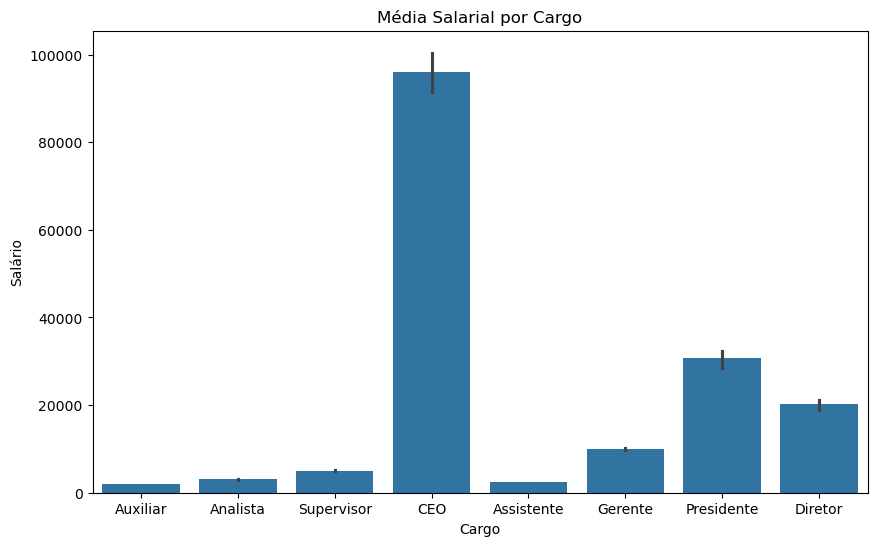

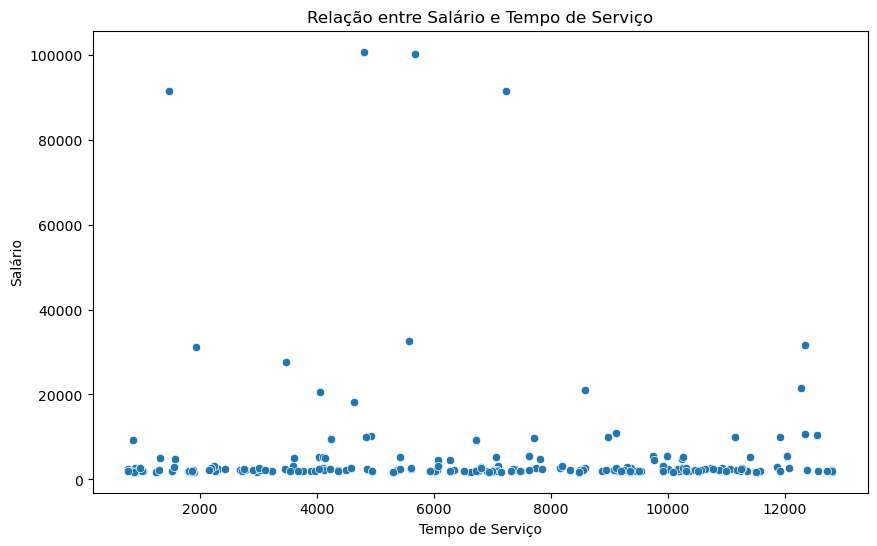

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria um gráfico de barras para mostrar a média salarial por cargo
plt.figure(figsize=(10, 6))
sns.barplot(x=df['CARGO'], y=df['SALÁRIO'])
plt.title('Média Salarial por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Salário')
plt.show()

# Cria uma nova coluna com o tempo de serviço
from datetime import date
df['DATA-ADMISSÃO'] = pd.to_datetime(df['DATA-ADMISSÃO'])
df['TEMPO DE SERVIÇO'] = (date.today() - df['DATA-ADMISSÃO'].dt.date).apply(lambda x: x.days)

# Cria um scatter plot para mostrar a relação entre salário e tempo de serviço
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TEMPO DE SERVIÇO'], y=df['SALÁRIO'])
plt.title('Relação entre Salário e Tempo de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Salário')
plt.show()



In [40]:
# Verifica se a coluna existe no DataFrame
print(df.columns)

# Renomeia a coluna para o nome correto
df = df.rename(columns={'TEMPO_DE_SERVICO': 'TEMPO DE SERVIÇO'})



Index(['NOME', 'ID-REGISTRO', 'DATA-ADMISSÃO', 'CARGO', 'SALÁRIO',
       'CIDADE-ATUAÇÃO', 'LOJA'],
      dtype='object')


In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Crie uma lista de dados

data = [
    [dt.datetime(2020, 1, 1, 10, 13), 2222, 1, True],
    [dt.datetime(2020, 1, 2), np.nan, 2, False],
    [dt.datetime(2020, 1, 2), np.inf, 3, True]
]

# Crie um DataFrame

df = pd.DataFrame(
    data=data,
    columns=["Dates", "Floats", "Integers", "Booleans"]
)

# Defina o nome do índice

df.index.name = "index"

# Exiba o DataFrame

print(df)

                    Dates  Floats  Integers  Booleans
index                                                
0     2020-01-01 10:13:00  2222.0         1      True
1     2020-01-02 00:00:00     NaN         2     False
2     2020-01-02 00:00:00     inf         3      True


In [6]:
import pandas as pd
from pathlib import Path
import os

# Obtém o diretório atual
this_dir = Path(os.getcwd())

# Define a pasta onde os arquivos Excel estão localizados
data_dir = this_dir / "sales_data"

# Cria uma lista vazia para armazenar os dados
parts = []

# Lê os arquivos Excel
for path in data_dir.rglob("*xls*"):
    print(f'Reading {path.name}')
    try:
        part = pd.read_excel(path, index_col="transaction_id")
        parts.append(part)
    except Exception as e:
        print(f'Erro ao ler {path.name}: {str(e)}')

# Verifica se a lista parts não está vazia
if parts:
    # Concatena os dados
    df = pd.concat(parts)

    # Cria a tabela pivot
    pivot = pd.pivot_table(df, index="transaction_date", columns="store", values="amount", aggfunc="sum")

    # Resample e soma os dados
    summary = pivot.resample("M").sum()

    # Renomeia o índice
    summary.index.name = "Month"

    # Salva o resultado em um arquivo Excel
    summary.to_excel(this_dir / "sales_report_pandas.xlsx")
else:
    print("Nenhum arquivo Excel encontrado.")

Nenhum arquivo Excel encontrado.
